## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-012-07-Hard-Robot-2DOF-Tracks-01

In [1]:
resultimage='../../Results/Chapter 12/Chapter-012-07-Hard-Robot-2DOF-Tracks-01-01.jpg'
resultdata='../../Results/Chapter 12/0Chapter-012-07-Hard-Robot-2DOF-Tracks-01a.csv'
resulttrack='../../Results/Chapter 12/Chapter-012-07-Hard-Robot-2DOF-Tracks-01b.csv'
resultall='../../Results/Chapter 12/Chapter-012-07-Hard-Robot-2DOF-Tracks-01c.csv'

## Part A - Load Libraries

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part B - Calculate Robot

In [4]:
armAngleRangeMin= -170
armAngleRangeMax=  170
armLiftRangeMin= -150
armLiftRangeMax=  150
trackAngle= 45
l=500
s=15

t=0


for tr in range(-1000,1000,100):
    Qr = np.radians(trackAngle)
    tx=tr*np.sin(Qr)
    ty=tr*np.cos(Qr)
    tz=10
    
    for Q2d in range(armLiftRangeMin,armLiftRangeMax+1,s):
        Q2r = np.radians(Q2d)
        z=l*np.sin(Q2r) + tz
        p=l*np.cos(Q2r)

        for Q1d in range(armAngleRangeMin,armAngleRangeMax+1,s):
            Q1r = np.radians(Q1d)
            x=p*np.sin(Q1r) + tx
            y=p*np.cos(Q1r) + ty
            #print('Angle Disk: %+9.3f Angle Lift: %+9.3f Arm length= %+5.3f x= %+5.3f y= %+5.3f z= %+5.3f' % (Q1d,Q2d,l,x,y,z))


            t+=1
            if t==1:
                xp=pd.DataFrame([x])
                yp=pd.DataFrame([y])
                zp=pd.DataFrame([z])
                xt=pd.DataFrame([tx])
                yt=pd.DataFrame([ty])
                zt=pd.DataFrame([tz])
            else:
                xp=xp.append([x])
                yp=yp.append([y])
                zp=zp.append([z])
                xt=xt.append([tx])
                yt=yt.append([ty])
                zt=zt.append([tz])

In [5]:
x1=xp[0]
y1=yp[0]
z1=zp[0]
frames = [x1, y1, z1]
dp=pd.concat(frames, axis=1)
dp.columns = ['X','Y','Z']
print(dp.shape)

(9660, 3)


In [6]:
x2=xt[0]
y2=yt[0]
z2=zt[0]
frames = [x2, y2, z2]
dt=pd.concat(frames, axis=1)
dt.columns = ['X','Y','Z']
print(dt.shape)

(9660, 3)


In [7]:
frames = [x1, y1, z1, x2, y2, z2]
da=pd.concat(frames, axis=1)
da.columns = ['X1','Y1','Z1','X2','Y2','Z2']
print(da.shape)

(9660, 6)


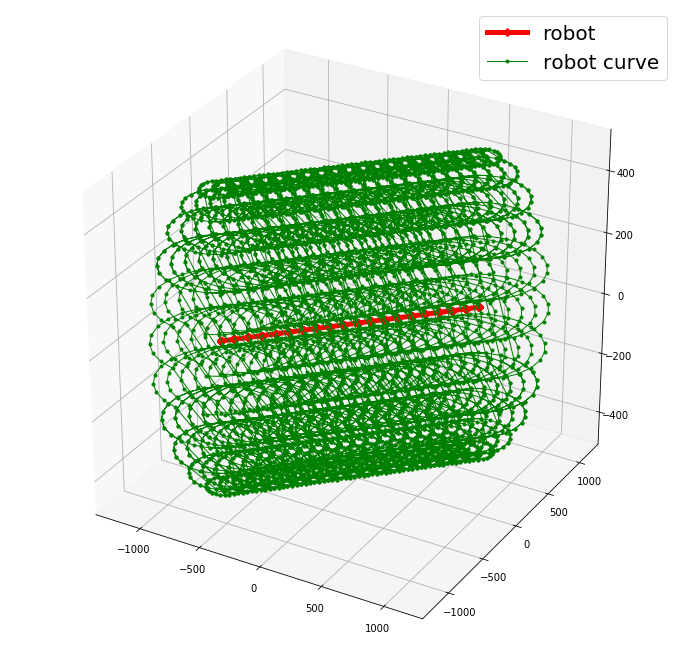

In [8]:
mpl.rcParams['legend.fontsize'] = 20

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot(xs=x2, ys=y2, zs=z2, label='robot', marker='D', color='red', linewidth=5)
ax.plot(xs=x1, ys=y1, zs=z1, label='robot curve', marker='.', color='green',linewidth=1)
ax.legend()
plt.show()

In [9]:
fig.savefig(resultimage)

In [10]:
dp.to_csv(resultdata, index=False)
dt.to_csv(resulttrack, index=False)
da.to_csv(resultall, index=False)

## Done

In [11]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-30 16:34:39.184407
